In [3]:
# 패키지 참조

import pandas as pd
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys
from os import path, mkdir
import folium

In [4]:
# 데이터 불러오기
origin = read_excel("Excel Data/세종시_CCTV관련.xlsx")
origin.head()

,관리기관명,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,관리기관전화번호,위도,경도,데이터기준일자
0,세종특별자치시,세종특별자치시 세종동 981,생활방범,2,200,세종리 은행나무역사공원 입구남측,30,044-300-2454,36.503216,127.290461,2023-07-04
1,세종특별자치시,세종특별자치시 세종동 855-1,생활방범,2,200,세종리 은행나무역사공원 동측 금강사이도로,30,044-300-2454,36.501924,127.296971,2023-07-04
2,세종특별자치시,세종특별자치시 세종동 1201,생활방범,3,200,세종호수공원 B코스,30,044-300-2454,36.498162,127.277682,2023-07-04
3,세종특별자치시,세종특별자치시 세종동 1201,생활방범,3,200,세종호수공원 A코스,30,044-300-2454,36.494496,127.271841,2023-07-04
4,세종특별자치시,세종특별자치시 세종동 1201,생활방범,3,200,중앙공원 도시 전망대 앞,30,044-300-2454,36.493051,127.271102,2023-07-04


### Folium으로 시각화

In [5]:
# # zoom_start: 배율 1~22 (여기서는 출력 안함)
# map_osm=folium.Map(location=[36.4799919, 127.2890511],zoom_start=12)

# #마커 클릭시 폰트 색깔 지정
# html="<font color='blue' style='white-space:nowrap'><b>%s</b></font>"

# #데이터프레임의 행 수만큼 반복하면서 마커 생성
# for i in origin.index:
#     #행 우선 접근 방식으로 값 추출하기
#     name=origin.loc[i,'소재지지번주소']
#     lat=origin.loc[i,'위도']
#     lng=origin.loc[i,'경도']

#     #추출한 정보를 지도에 표시
#     popup_html=folium.Popup(html%name,parse_html=False)
#     marker=folium.Marker([lat,lng],popup=popup_html)
#     marker.add_to(map_osm)

#     #웹 페이지 파일이 저장될 폴더 생성
#     if not path.exists('output'):
#         mkdir('output')

#     map_osm.save('output/세종시_CCTV_위치.html') #파일이 저장될 위치

# map_osm

> 데이터가 많아서 Folium 시각화까지 상당히 많은 시간 소요. 한번 출력 후 주석으로 막음

In [6]:
df=origin.copy()

# 지번주소 라는 컬럼에서 문자열 데이터를 split(자르기) 후에 공백을 기준으로 2번째 열만 선택 
gu=df['소재지지번주소'].str.split(" ",expand=True)[1]

# assign함수 이용하여 'gu'변수를 '행정구'로 변경해서 추가
df1=df.assign(행정구=gu)
df1.drop(['관리기관전화번호','보관일수','데이터기준일자'],axis=1,inplace=True)
df1.head()

,관리기관명,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,위도,경도,행정구
0,세종특별자치시,세종특별자치시 세종동 981,생활방범,2,200,세종리 은행나무역사공원 입구남측,36.503216,127.290461,세종동
1,세종특별자치시,세종특별자치시 세종동 855-1,생활방범,2,200,세종리 은행나무역사공원 동측 금강사이도로,36.501924,127.296971,세종동
2,세종특별자치시,세종특별자치시 세종동 1201,생활방범,3,200,세종호수공원 B코스,36.498162,127.277682,세종동
3,세종특별자치시,세종특별자치시 세종동 1201,생활방범,3,200,세종호수공원 A코스,36.494496,127.271841,세종동
4,세종특별자치시,세종특별자치시 세종동 1201,생활방범,3,200,중앙공원 도시 전망대 앞,36.493051,127.271102,세종동


In [7]:
# 행정구별로 count 진행
cdf=DataFrame(df1.filter(['행정구']).value_counts(),columns=['count']).reset_index()
cdf

,행정구,count
0,조치원읍,208
1,금남면,126
2,고운동,90
3,어진동,79
4,부강면,63
5,세종동,61
6,장군면,53
7,전의면,53
8,연서면,48
9,연기면,45


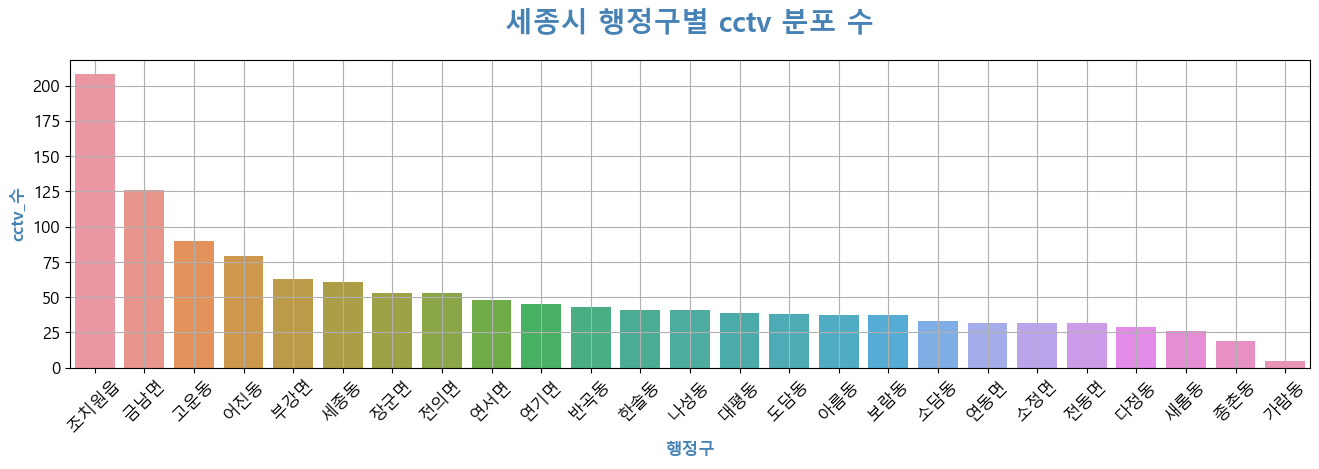

In [8]:
# seaborn 막대그래프 활용하여 시각화 진행

plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.unicode_minus"] = False

plt.rcParams["figure.figsize"]=(16,4)
plt.figure()
plt.title("세종시 행정구별 cctv 분포 수",pad=20,color='steelblue',fontsize=20,fontweight='bold')
sb.barplot(data=cdf,x=cdf['행정구'],y=cdf['count'])
plt.xlabel("행정구",color='steelblue',fontweight='bold')
plt.ylabel("cctv_수",color='steelblue',fontweight='bold')
plt.xticks(rotation=45) # x축 레이블(텍스트)각도 조절
plt.grid()
plt.show()
plt.close()

> 조치원읍이 cctv 수가 압도적으로 많은 것을 알 수 있다.

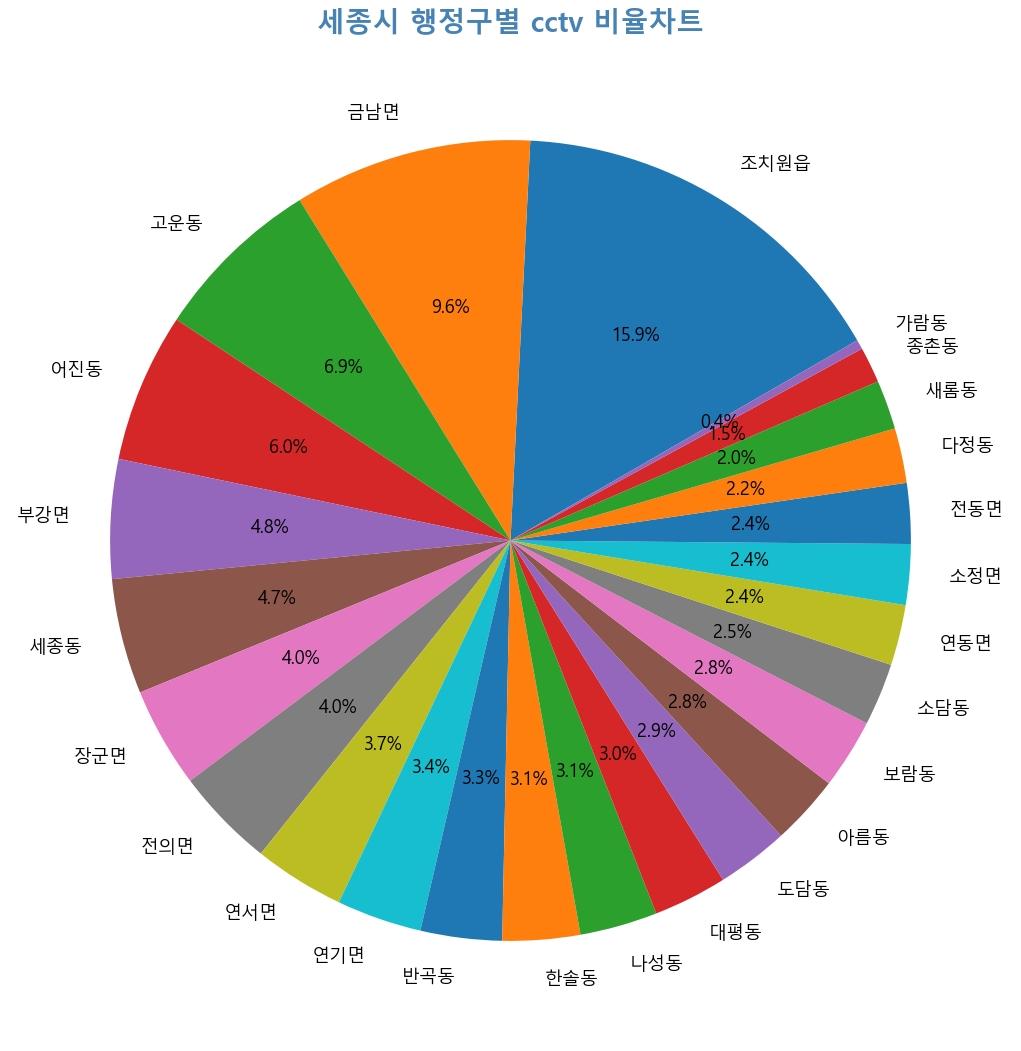

In [9]:
# 파이차트 시각화

colors = ['tomato', 'coral', 'orangered', 'darkorange', 'salmon','lime', 'limegreen', 'chartreuse', 'greenyellow']
plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (13, 13)
plt.figure()
plt.title("세종시 행정구별 cctv 비율차트",color='steelblue',fontweight='bold',fontsize=20)
plt.pie(cdf['count'], labels=cdf['행정구'], autopct='%0.1f%%',startangle=30)
plt.show()
plt.close()

> 파이차트 확인 결과 조치원읍이 세종시 전체 cctv의 약 16%정도를 차지하고 있는것으로 나타난다.